In [3]:
import warnings
warnings.filterwarnings('ignore')
import os
import sys
import pickle
from ipywidgets import interact
from collections import Counter
import time
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn                       
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_predict, RepeatedStratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
import imblearn
from imblearn.over_sampling import SMOTE
np.random.seed(1)

### EDA :

In [4]:
df = pd.read_csv('full_data.csv')
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [5]:
df.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0
4980,Female,80.0,1,0,Yes,Private,Urban,83.75,29.1,never smoked,0


In [6]:
df.shape

(4981, 11)

In [7]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [8]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [10]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [11]:
df.value_counts

<bound method DataFrame.value_counts of       gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1       Male  80.0             0              1          Yes        Private   
2     Female  49.0             0              0          Yes        Private   
3     Female  79.0             1              0          Yes  Self-employed   
4       Male  81.0             0              0          Yes        Private   
...      ...   ...           ...            ...          ...            ...   
4976    Male  41.0             0              0           No        Private   
4977    Male  40.0             0              0          Yes        Private   
4978  Female  45.0             1              0          Yes       Govt_job   
4979    Male  40.0             0              0          Yes        Private   
4980  Female  80.0             1              0          Yes        Private   

     Reside

### Preprocessing :


In [12]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df['age'] = df['age'].astype(int)
print(df.dtypes)

gender                object
age                    int64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [15]:
df['smoking_status'].value_counts()

smoking_status
never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: count, dtype: int64

In [16]:
df = df.replace('Unknown', np.nan)

In [17]:
df['smoking_status'].fillna(df['smoking_status'].mode()[0], inplace=True)

In [18]:
cat_columns = ['gender', 'smoking_status']
df = pd.get_dummies(df, columns = cat_columns)
df

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67,0,1,Yes,Private,Urban,228.69,36.6,1,False,True,True,False,False
1,80,0,1,Yes,Private,Rural,105.92,32.5,1,False,True,False,True,False
2,49,0,0,Yes,Private,Urban,171.23,34.4,1,True,False,False,False,True
3,79,1,0,Yes,Self-employed,Rural,174.12,24.0,1,True,False,False,True,False
4,81,0,0,Yes,Private,Urban,186.21,29.0,1,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,41,0,0,No,Private,Rural,70.15,29.8,0,False,True,True,False,False
4977,40,0,0,Yes,Private,Urban,191.15,31.1,0,False,True,False,False,True
4978,45,1,0,Yes,Govt_job,Rural,95.02,31.8,0,True,False,False,False,True
4979,40,0,0,Yes,Private,Rural,83.94,30.0,0,False,True,False,False,True


In [19]:
df.drop(columns=['ever_married','work_type','Residence_type'], inplace=True)
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67,0,1,228.69,36.6,1,False,True,True,False,False
1,80,0,1,105.92,32.5,1,False,True,False,True,False
2,49,0,0,171.23,34.4,1,True,False,False,False,True
3,79,1,0,174.12,24.0,1,True,False,False,True,False
4,81,0,0,186.21,29.0,1,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
4976,41,0,0,70.15,29.8,0,False,True,True,False,False
4977,40,0,0,191.15,31.1,0,False,True,False,False,True
4978,45,1,0,95.02,31.8,0,True,False,False,False,True
4979,40,0,0,83.94,30.0,0,False,True,False,False,True


In [20]:
df.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'gender_Female', 'gender_Male',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

### visualization :

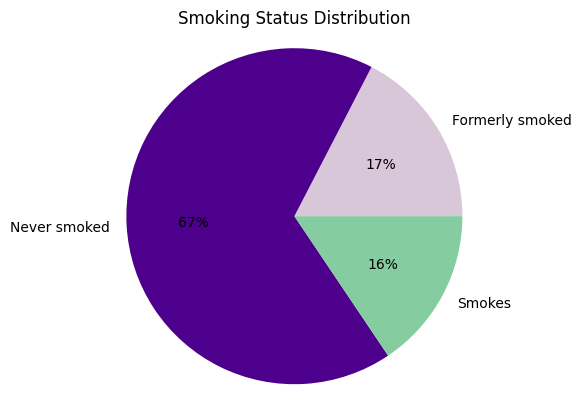

In [21]:
smoking_labels = ['Formerly smoked', 'Never smoked', 'Smokes']
smoking_counts = [867, 3338, 776]  

plt.pie(smoking_counts, labels=smoking_labels, autopct='%.0f%%' , colors= [ '#D8C6D9','#4C008C'  ,'#85CCA0'])
plt.title('Smoking Status Distribution')
plt.axis('equal')  
plt.show()

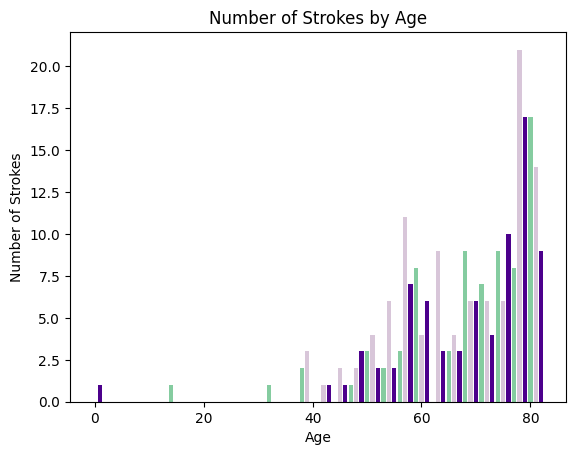

In [22]:
age_stroke_counts = df.groupby('age')['stroke'].sum()

colors = [ '#D8C6D9','#4C008C'  ,'#85CCA0']

plt.bar(age_stroke_counts.index, age_stroke_counts.values, color=colors)
plt.xlabel('Age')
plt.ylabel('Number of Strokes')
plt.title('Number of Strokes by Age')
plt.show()

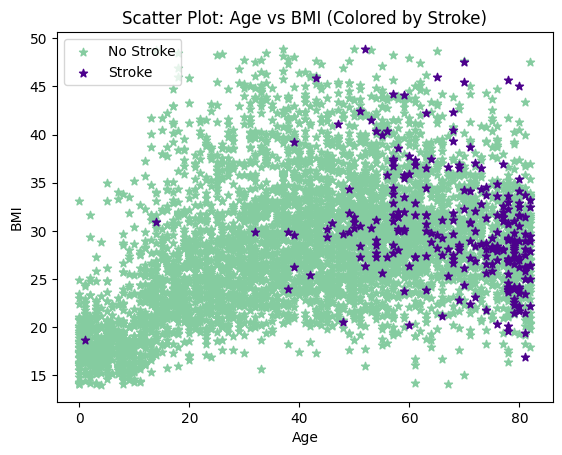

In [23]:
import matplotlib.pyplot as plt

stroke_data = df[df['stroke'] == 1]
non_stroke_data = df[df['stroke'] == 0]

plt.scatter(non_stroke_data['age'], non_stroke_data['bmi'], c='#85CCA0', label='No Stroke' , marker='*')
plt.scatter(stroke_data['age'], stroke_data['bmi'], c='#4C008C', label='Stroke' , marker='*')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Scatter Plot: Age vs BMI (Colored by Stroke)')
plt.legend()
plt.show()

### Outlaires :


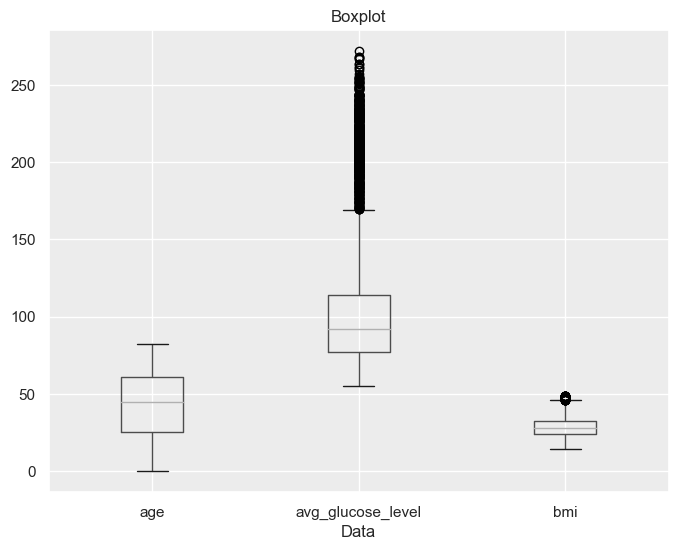

In [29]:
features = ['age', 'avg_glucose_level', 'bmi']

plt.figure(figsize=(8, 6))
df[features].boxplot()
plt.title('Boxplot')
plt.xlabel('Data')
plt.show()

In [30]:
features = ['age', 'avg_glucose_level', 'bmi']

def limits(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1

    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR

    print("Upper Bound:",upper)
    print("Lower Bound:",lower)
    return upper, lower

print("age")
upper1, lower1 = limits(df['age'])
print("----------------------------------")
print("avg_glucose_level")
upper2, lower2 = limits(df['avg_glucose_level'])
print("----------------------------------")
print("bmi")
upper3, lower3 = limits(df['bmi'])

age
Upper Bound: 115.0
Lower Bound: -29.0
----------------------------------
avg_glucose_level
Upper Bound: 168.805
Lower Bound: 22.28500000000001
----------------------------------
bmi
Upper Bound: 45.95
Lower Bound: 10.349999999999996


In [31]:
outliers = df[(df['age'] < lower1) | (df['age'] > upper1)]
df = df.drop(outliers.index)

outliers = df[(df['avg_glucose_level'] < lower2) | (df['avg_glucose_level'] > upper2)]
df = df.drop(outliers.index)

outliers = df[(df['bmi'] < lower3) | (df['bmi'] > upper3)]
df = df.drop(outliers.index)

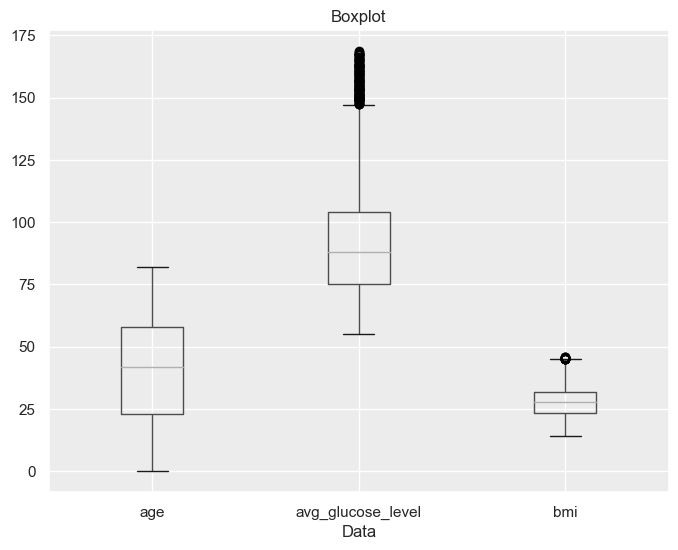

In [32]:
plt.figure(figsize=(8, 6))
df[features].boxplot()
plt.title('Boxplot')
plt.xlabel('Data')
plt.show()

## Machine learning 

### train-test split : 

In [33]:
X = df.drop(['stroke'], axis=1)
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X,y , random_state=40,test_size=0.20, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3477, 10), (870, 10), (3477,), (870,))

In [34]:
y_train.value_counts(normalize = True).round(2)

stroke
0    0.96
1    0.04
Name: proportion, dtype: float64

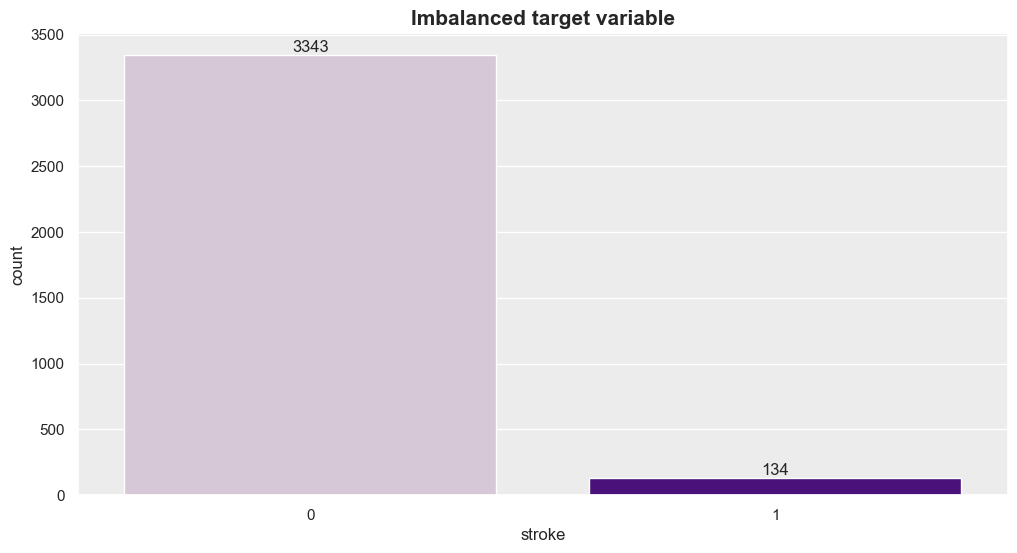

In [35]:
sns.set(rc={'axes.facecolor':'#ECECEC'}) #background color of plot
plt.figure(figsize=(12,6))
plt.title("Imbalanced target variable", fontsize=15, fontweight='bold', ha='center')
ax = sns.countplot(x=y_train, data=df, palette=['#D8C6D9','#4C008C'  ])

#add labels to each bar
abs_values = y_train.value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)

#show the plot
plt.show()

In [36]:
smote = SMOTE(sampling_strategy='minority')
X_SMOTE, y_SMOTE = smote.fit_resample(X_train, y_train)
X_SMOTE = pd.DataFrame(data = X_SMOTE, columns = X_SMOTE.columns)

In [37]:
print(f"Imbalanced target class: {Counter(y_train)}\n\nBalanced target class: {Counter(y_SMOTE)}\n")
print(X_SMOTE.shape[0] - df.shape[0], 'new random picked points')

Imbalanced target class: Counter({0: 3343, 1: 134})

Balanced target class: Counter({0: 3343, 1: 3343})

2339 new random picked points


In [ ]:
sns.set(rc={'axes.facecolor':'#ECECEC'})
plt.figure(figsize=(12,6))
plt.title("Balanced target variable", fontsize=15, fontweight='bold', ha='center')
ax = sns.countplot(x=y_SMOTE, data=df, palette=['#D8C6D9','#4C008C' ])
plt.show()

In [40]:
def plot_conf_mtrix(name, y_pred, y_test):
    print()
    cf_matrix = confusion_matrix(y_test, y_pred)

    ax = sns.heatmap(cf_matrix / np.sum(cf_matrix), annot = True, fmt = '.2%', cmap = plt.cm.Blues)
    ax.set_title(f'{name} Confusion Matrix\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values');

    ax.xaxis.set_ticklabels(['0','1'])
    ax.yaxis.set_ticklabels(['0','1'])

    plt.show()

In [41]:
def cls_report(name, y_pred, y_test):
    print(f'{name} Classification Report :\n')
    print('-'*54)
    print()
    print(classification_report(y_test, y_pred))
    print('-'*54)
    print()
    print('Accuracy Score  : ' + str(round(accuracy_score(y_test, y_pred),3)))
    print('Precision Score : ' + str(round(precision_score(y_test, y_pred),3)))
    print('Recall Score    : ' + str(round(recall_score(y_test, y_pred),3)))
    print('F-Score         : ' + str(round(f1_score(y_test, y_pred),3)))

In [42]:
models = [LogisticRegression(), SVC(kernel = 'linear'), KNeighborsClassifier(), RandomForestClassifier(), DecisionTreeClassifier()]

def compare_model_train_test():
    for model in models:
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test,y_pred)
        print('\n\nThe accuracy score of the ',model,' = ',accuracy)
        cls_report(model, y_pred, y_test)
        plot_conf_mtrix(model,y_pred,y_test)



The accuracy score of the  LogisticRegression()  =  0.964367816091954
LogisticRegression() Classification Report :

------------------------------------------------------

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       839
           1       0.00      0.00      0.00        31

    accuracy                           0.96       870
   macro avg       0.48      0.50      0.49       870
weighted avg       0.93      0.96      0.95       870

------------------------------------------------------

Accuracy Score  : 0.964
Precision Score : 0.0
Recall Score    : 0.0
F-Score         : 0.0



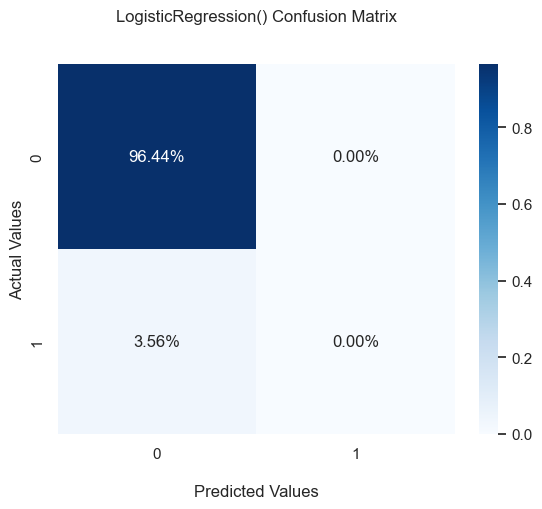

In [ ]:
compare_model_train_test()

In [ ]:
# fig = plt.figure(figsize = (25, 20));

# tree.plot_tree(
#     model,
#     feature_names = list(X),
#     class_names = ['Not Safe', 'Safe'],
#     max_depth = 2,
#     filled = True
# );

### cross-validation split :

In [ ]:
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X, y, test_size = 0.1, random_state = 42)
print(X_train_cv.shape, X_test_cv.shape, y_train_cv.shape, y_test_cv.shape)

smote_cv = SMOTE(sampling_strategy='minority')

X_SMOTE_cv, y_SMOTE_cv = smote_cv.fit_resample(X_train_cv, y_train_cv)
X_SMOTE_cv = pd.DataFrame(data = X_SMOTE_cv, columns = X_SMOTE_cv.columns)

In [ ]:
from sklearn.model_selection import cross_val_score

cross_validation_t_time = []
cross_validation_scores = []

cv_models = {
    'Logistic Regression' : LogisticRegression(),
    'KNN' : KNeighborsClassifier(),
    'SVM' : SVC(),
    'Decision Tree' : DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier(),
}

for model in cv_models:
    start = time.time()
    scores = cross_val_score(cv_models[model], X_SMOTE_cv, y_SMOTE_cv, cv = 10)
    end = time.time()
    print(f'{model} List of scores :\n{scores}')
    cross_validation_t_time.append(end - start)
    avg_scores = np.mean(scores)

    print(f'{model} Average Score : {avg_scores}\n')

    cross_validation_scores.append(avg_scores)

def compare_model_train_test():
    for model in models:
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test,y_pred)
        print('\n\nThe accuracy score of the ',model,' = ',accuracy)
        cls_report(model, y_pred, y_test)
        plot_conf_mtrix(model,y_pred,y_test)

In [ ]:
cv_rf = RandomForestClassifier()

cv_rf.fit(X_SMOTE_cv, y_SMOTE_cv)

y_pred = cv_rf.predict(X_test)

print('Accuracy for the best model using the fainal testing set :-')
print(accuracy_score(y_test, y_pred).round(4))

### GridSearchCV :

In [ ]:
training_time_hyp = []
prediction_time_hyp = []
training_scores_hyp = []
accuracies_hyp = []

In [38]:
X_train_hyp, X_test_hyp, y_train_hyp, y_test_hyp = train_test_split(X, y, test_size = 0.1, random_state = 42)
print(X_train_hyp.shape, X_test_hyp.shape, y_train_hyp.shape, y_test_hyp.shape)

smote_hyp = SMOTE(sampling_strategy='minority')

X_SMOTE_hyp, y_SMOTE_hyp = smote_hyp.fit_resample(X_train_hyp, y_train_hyp)
X_SMOTE_hyp = pd.DataFrame(data = X_SMOTE_hyp, columns = X_SMOTE_hyp.columns)

(3912, 10) (435, 10) (3912,) (435,)


#### logistic regression :

The model was trained successfuly.

The predicted values       : Counter({0: 405, 1: 30}).
The real values            : Counter({0: 417, 1: 18}).
The accuracy for the model : 0.9218
Number of mislabeled points out of a total 435 points: 34



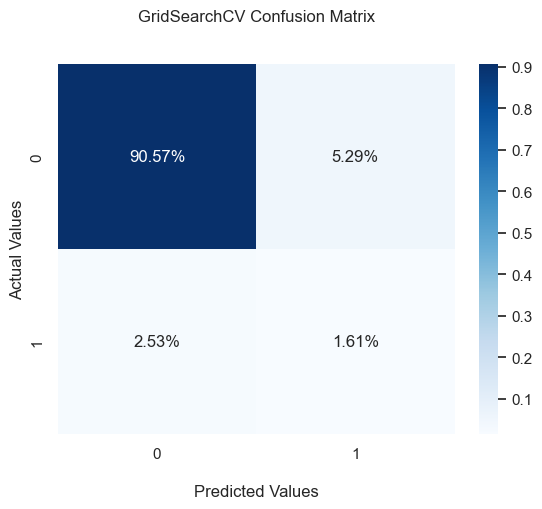

GridSearchCV Classification Report :

------------------------------------------------------

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       417
           1       0.23      0.39      0.29        18

    accuracy                           0.92       435
   macro avg       0.60      0.67      0.63       435
weighted avg       0.94      0.92      0.93       435

------------------------------------------------------

Accuracy Score  : 0.922
Precision Score : 0.233
Recall Score    : 0.389
F-Score         : 0.292


In [39]:
lr_hyp = LogisticRegression()

penalty = ['l1', 'l2', 'elasticnet', 'none']
C       = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
solver  = ['lbfgs','newton-cg','liblinear','sag','saga']

lr_hyperparameters = dict(penalty=penalty, C=C, solver=solver)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid_search = GridSearchCV(
    estimator=lr_hyp,
    param_grid=lr_hyperparameters,
    cv=cv,
    scoring='accuracy',
    return_train_score=True
)

start = time.time()
best_lr = grid_search.fit(X_SMOTE_hyp, y_SMOTE_hyp)
end = time.time()

t_time = end - start

print('The model was trained successfuly.\n')

start = time.time()
lr_y_pred_hyp = best_lr.predict(X_test_hyp)
end = time.time()

p_time = end - start

t_score = best_lr.score(X_SMOTE_hyp, y_SMOTE_hyp)

print(f'The predicted values       : {Counter(lr_y_pred_hyp)}.')
print(f'The real values            : {Counter(y_test_hyp)}.')

accu = accuracy_score(y_test_hyp, lr_y_pred_hyp).round(4)

print(f'The accuracy for the model : {accu}')
print('Number of mislabeled points out of a total %d points: %d' % (X_test_hyp.shape[0], (y_test_hyp != lr_y_pred_hyp).sum()))

plot_conf_mtrix(best_lr.__class__.__name__, lr_y_pred_hyp, y_test_hyp)
cls_report(best_lr.__class__.__name__, lr_y_pred_hyp, y_test_hyp)

In [42]:
# Best Hyperparameters Value
print('Best penalty:', best_lr.best_estimator_.get_params()['penalty'])
print('Best C:', best_lr.best_estimator_.get_params()['C'])
print('Best solver:', best_lr.best_estimator_.get_params()['solver'])

Best penalty: l1
Best C: 1
Best solver: liblinear


In [43]:
training_scores_hyp.append(t_score)
accuracies_hyp.append(accu)

#### KNN

The model was trained successfuly.

The predicted values       : Counter({0: 381, 1: 54}).
The predicted values       : Counter({0: 417, 1: 18}).
The accuracy for the model : 0.8713
Number of mislabeled points out of a total 870 points: 56



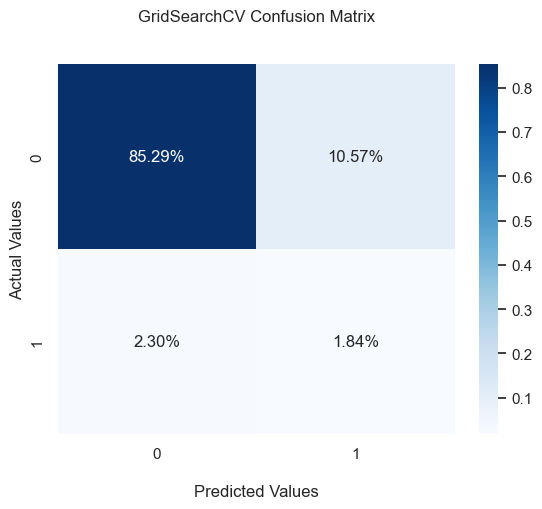

GridSearchCV Classification Report :

------------------------------------------------------

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       417
           1       0.15      0.44      0.22        18

    accuracy                           0.87       435
   macro avg       0.56      0.67      0.58       435
weighted avg       0.94      0.87      0.90       435

------------------------------------------------------

Accuracy Score  : 0.871
Precision Score : 0.148
Recall Score    : 0.444
F-Score         : 0.222


In [44]:
knn_hyp = KNeighborsClassifier()

n_neighbors = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
weights = ['distance'] 
metric = ['euclidean'] 
algorithm = ['auto'] 

knn_hyperparameters = dict(n_neighbors=n_neighbors,weights=weights,metric=metric,algorithm=algorithm)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

grid_search = GridSearchCV(
    estimator=knn_hyp,
    param_grid=knn_hyperparameters,
    cv=cv,
    scoring='accuracy',
    return_train_score=True
)

start = time.time()
best_knn = grid_search.fit(X_SMOTE_hyp, y_SMOTE_hyp)
end = time.time()

training_time_hyp.append(end - start)

print('The model was trained successfuly.\n')

start = time.time()
knn_y_pred_hyp = best_knn.predict(X_test_hyp)
end = time.time()

prediction_time_hyp.append(end - start)

training_scores_hyp.append(best_knn.score(X_SMOTE_hyp, y_SMOTE_hyp))

print(f'The predicted values       : {Counter(knn_y_pred_hyp)}.')
print(f'The predicted values       : {Counter(y_test_hyp)}.')

accu = accuracy_score(y_test_hyp, knn_y_pred_hyp).round(4)
accuracies_hyp.append(accu)

print(f'The accuracy for the model : {accu}')
print('Number of mislabeled points out of a total %d points: %d' % (X_test.shape[0], (y_test_hyp != knn_y_pred_hyp).sum()))

plot_conf_mtrix(best_knn.__class__.__name__, knn_y_pred_hyp, y_test_hyp)
cls_report(best_knn.__class__.__name__, knn_y_pred_hyp, y_test_hyp)

In [45]:
# Best Hyperparameters Value
print('Best n_neighbors:', best_knn.best_estimator_.get_params()['n_neighbors'])
print('Best weights:', best_knn.best_estimator_.get_params()['weights'])
print('Best metric:', best_knn.best_estimator_.get_params()['metric'])
print('Best algorithm:', best_knn.best_estimator_.get_params()['algorithm'])

Best n_neighbors: 1
Best weights: distance
Best metric: euclidean
Best algorithm: auto


In [46]:
training_scores_hyp.append(t_score)
accuracies_hyp.append(accu)

#### SVM

The model was trained successfuly.

The predicted values       : Counter({0: 398, 1: 37}).
The real values       : Counter({0: 417, 1: 18}).
The accuracy for the model : 0.9149
Number of mislabeled points out of a total 435 points: 37



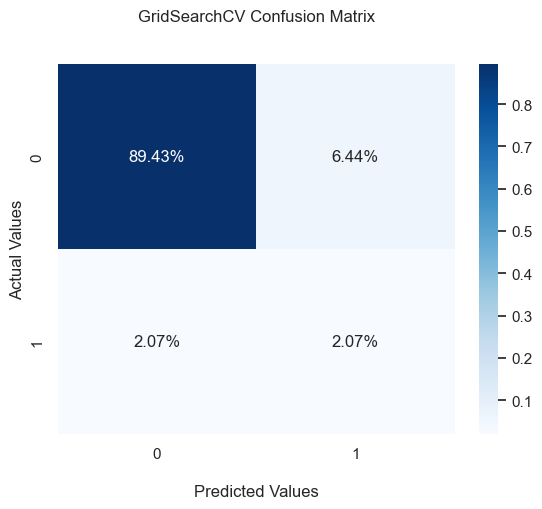

GridSearchCV Classification Report :

------------------------------------------------------

              precision    recall  f1-score   support

           0       0.98      0.93      0.95       417
           1       0.24      0.50      0.33        18

    accuracy                           0.91       435
   macro avg       0.61      0.72      0.64       435
weighted avg       0.95      0.91      0.93       435

------------------------------------------------------

Accuracy Score  : 0.915
Precision Score : 0.243
Recall Score    : 0.5
F-Score         : 0.327


In [47]:
svm_hyp = SVC()

kernel = ['poly', 'rbf', 'sigmoid']
C = [1, 10, 100]
gamma = ['scale']

svm_hyperparameters = dict(kernel=kernel, C=C, gamma=gamma)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid_search = GridSearchCV(
    estimator=svm_hyp,
    param_grid=svm_hyperparameters,
    n_jobs=-1,
    cv=cv,
    scoring='accuracy',
    error_score=0,
    return_train_score=True
)

start = time.time()
best_svm = grid_search.fit(X_SMOTE_hyp, y_SMOTE_hyp)
end = time.time()

t_time = end - start

print('The model was trained successfuly.\n')

start = time.time()
svm_y_pred_hyp = best_svm.predict(X_test_hyp)
end = time.time()

p_time = end - start

t_score = best_svm.score(X_SMOTE_hyp, y_SMOTE_hyp)

print(f'The predicted values       : {Counter(svm_y_pred_hyp)}.')
print(f'The real values       : {Counter(y_test_hyp)}.')

accu = accuracy_score(y_test_hyp, svm_y_pred_hyp).round(4)

print(f'The accuracy for the model : {accu}')
print('Number of mislabeled points out of a total %d points: %d' % (X_test_hyp.shape[0], (y_test_hyp != svm_y_pred_hyp).sum()))

plot_conf_mtrix(best_svm.__class__.__name__, svm_y_pred_hyp, y_test_hyp)
cls_report(best_svm.__class__.__name__, svm_y_pred_hyp, y_test_hyp)

In [48]:
# Best Hyperparameters Value
print('Best kernel:', best_svm.best_estimator_.get_params()['kernel'])
print('Best C:', best_svm.best_estimator_.get_params()['C'])
print('Best gamma:', best_svm.best_estimator_.get_params()['gamma'])

Best kernel: rbf
Best C: 100
Best gamma: scale


In [49]:
training_scores_hyp.append(t_score)
accuracies_hyp.append(accu)

#### Decession Tree

The model was trained successfuly.

The predicted values       : Counter({0: 401, 1: 34}).
The real values            : Counter({0: 417, 1: 18}).
The accuracy for the model : 0.8943
Number of mislabeled points out of a total 435 points: 46



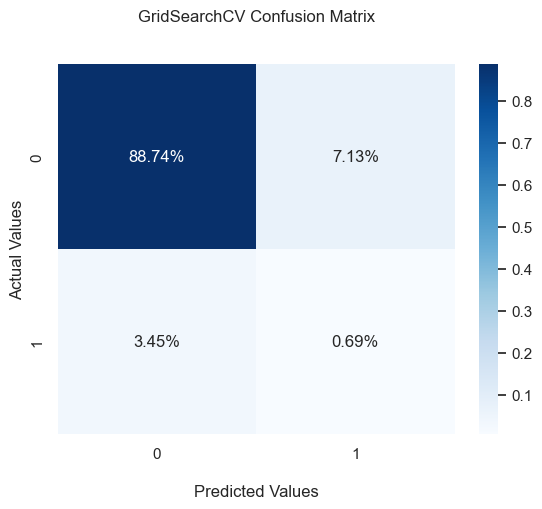

GridSearchCV Classification Report :

------------------------------------------------------

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       417
           1       0.09      0.17      0.12        18

    accuracy                           0.89       435
   macro avg       0.53      0.55      0.53       435
weighted avg       0.93      0.89      0.91       435

------------------------------------------------------

Accuracy Score  : 0.894
Precision Score : 0.088
Recall Score    : 0.167
F-Score         : 0.115


In [50]:
dt_hyp = DecisionTreeClassifier()

criterion = ["gini", "entropy"]
max_depth = [2, 4, 6, 8, 10]
max_features = ['auto', 'sqrt', 'log2']

dt_hyperparameters = dict(
    criterion=criterion,
    max_depth=max_depth,
    max_features=max_features
)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid_search = GridSearchCV(
    estimator=dt_hyp,
    param_grid=dt_hyperparameters,
    n_jobs=-1,
    cv=cv,
    scoring='accuracy',
    error_score=0,
    return_train_score=True
)

start = time.time()
best_dt = grid_search.fit(X_SMOTE_hyp, y_SMOTE_hyp)
end = time.time()

t_time = end - start

print('The model was trained successfuly.\n')

start = time.time()
dt_y_pred_hyp = best_dt.predict(X_test_hyp)
end = time.time()

p_time = end - start

t_score = best_dt.score(X_SMOTE_hyp, y_SMOTE_hyp)

print(f'The predicted values       : {Counter(dt_y_pred_hyp)}.')
print(f'The real values            : {Counter(y_test_hyp)}.')

accu = accuracy_score(y_test_hyp, dt_y_pred_hyp).round(4)

print(f'The accuracy for the model : {accu}')
print('Number of mislabeled points out of a total %d points: %d' % (X_test_hyp.shape[0], (y_test_hyp != dt_y_pred_hyp).sum()))

plot_conf_mtrix(best_dt.__class__.__name__, dt_y_pred_hyp, y_test_hyp)
cls_report(best_dt.__class__.__name__, dt_y_pred_hyp, y_test_hyp)

In [51]:
# Best Hyperparameters Value
print('Best criterion:', best_dt.best_estimator_.get_params()['criterion'])
print('Best max_depth:', best_dt.best_estimator_.get_params()['max_depth'])
print('Best max_features:', best_dt.best_estimator_.get_params()['max_features'])

Best criterion: gini
Best max_depth: 10
Best max_features: sqrt


In [52]:
training_scores_hyp.append(t_score)
accuracies_hyp.append(accu)

#### Random forest 

The model was trained successfuly.

The predicted values       : Counter({0: 415, 1: 20}).
The real values            : Counter({0: 417, 1: 18}).
The accuracy for the model : 0.9356
Number of mislabeled points out of a total 435 points: 28



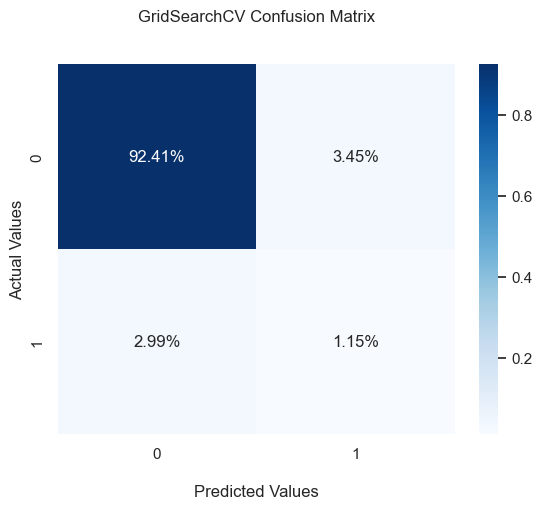

GridSearchCV Classification Report :

------------------------------------------------------

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       417
           1       0.25      0.28      0.26        18

    accuracy                           0.94       435
   macro avg       0.61      0.62      0.61       435
weighted avg       0.94      0.94      0.94       435

------------------------------------------------------

Accuracy Score  : 0.936
Precision Score : 0.25
Recall Score    : 0.278
F-Score         : 0.263


In [53]:
rf_hyp = RandomForestClassifier()

n_estimators = [100, 200, 500]
criterion = ["gini", "entropy"]
max_depth = [2, 4, 6, 8, 10]
max_features = ['auto', 'sqrt', 'log2']

rf_hyperparameters = dict(
    n_estimators=n_estimators,
    criterion=criterion,
    max_depth=max_depth,
    max_features=max_features
)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid_search = GridSearchCV(
    estimator=rf_hyp,
    param_grid=rf_hyperparameters,
    n_jobs=-1,
    cv=cv,
    scoring='accuracy',
    error_score=0,
    return_train_score=True
)

start = time.time()
best_rf = grid_search.fit(X_SMOTE_hyp, y_SMOTE_hyp)
end = time.time()

t_time = end - start

print('The model was trained successfuly.\n')

start = time.time()
rf_y_pred_hyp = best_rf.predict(X_test_hyp)
end = time.time()

p_time = end - start

t_score = best_rf.score(X_SMOTE_hyp, y_SMOTE_hyp)

print(f'The predicted values       : {Counter(rf_y_pred_hyp)}.')
print(f'The real values            : {Counter(y_test_hyp)}.')

accu = accuracy_score(y_test_hyp, rf_y_pred_hyp).round(4)

print(f'The accuracy for the model : {accu}')
print('Number of mislabeled points out of a total %d points: %d' % (X_test_hyp.shape[0], (y_test_hyp != rf_y_pred_hyp).sum()))

plot_conf_mtrix(best_rf.__class__.__name__, rf_y_pred_hyp, y_test_hyp)
cls_report(best_rf.__class__.__name__, rf_y_pred_hyp, y_test_hyp)

In [55]:
# Best Hyperparameters Value
print('Best n_estimators:', best_rf.best_estimator_.get_params()['n_estimators'])
print('Best criterion:', best_rf.best_estimator_.get_params()['criterion'])
print('Best max_depth:', best_rf.best_estimator_.get_params()['max_depth'])
print('Best max_features:', best_rf.best_estimator_.get_params()['max_features'])

Best n_estimators: 500
Best criterion: gini
Best max_depth: 10
Best max_features: sqrt


In [56]:
training_scores_hyp.append(t_score)
accuracies_hyp.append(accu)

#### best model

In [57]:
best_model = best_rf

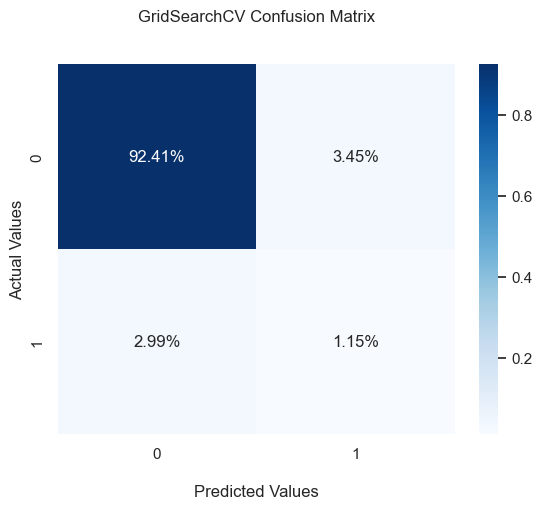

GridSearchCV Classification Report :

------------------------------------------------------

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       417
           1       0.25      0.28      0.26        18

    accuracy                           0.94       435
   macro avg       0.61      0.62      0.61       435
weighted avg       0.94      0.94      0.94       435

------------------------------------------------------

Accuracy Score  : 0.936
Precision Score : 0.25
Recall Score    : 0.278
F-Score         : 0.263


In [58]:
plot_conf_mtrix(best_model.__class__.__name__, rf_y_pred_hyp, y_test_hyp)
cls_report(best_model.__class__.__name__, rf_y_pred_hyp, y_test_hyp)